In [8]:
import pandas as pd
import os
import matplotlib.pyplot as plt

---

## DataFrame

In [2]:
files = [file for file in os.listdir('./datasets')]

df_sales = pd.DataFrame()

for file in files:
    df = pd.read_csv('./datasets/' + file)
    df_sales = pd.concat([df_sales, df])

In [3]:
df_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


---

## Data cleansing

In [4]:
df_sales = df_sales.dropna()

df_sales['Month'] = df_sales['Order Date'].str[0:2]
df_sales = df_sales[(df_sales['Month'] != 'Or')]

df_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [5]:
#df_sales['Month'].value_counts()
#df_sales.to_csv('df_sales.csv', index=False)

In [6]:
df_sales['Quantity Ordered'] = pd.to_numeric(df_sales['Quantity Ordered'])
df_sales['Price Each'] = pd.to_numeric(df_sales['Price Each'])

df_sales['Sales'] = df_sales['Quantity Ordered'] * df_sales['Price Each']

df_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99


In [14]:
def get_location(address):
    array = address.split(',')
    city = array[1]
    state = array[2].split(' ')[1]
    return city + ' (' + state + ')'

df_sales['City'] = df_sales['Purchase Address'].apply(lambda address: get_location(address))

df_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA)


---

## Charts

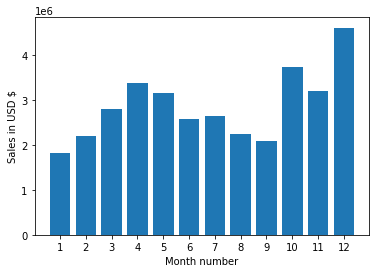

In [25]:
groupby_month = df_sales.groupby('Month').sum()

months = range(1, 13)

plt.bar(months, groupby_month['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD $')
plt.xlabel('Month number')

plt.show()

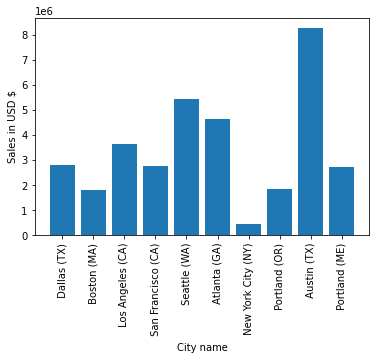

In [27]:
groupby_month = df_sales.groupby('City').sum()

cities = df_sales['City'].unique()

plt.bar(cities, groupby_month['Sales'])
plt.xticks(cities, rotation='vertical')
plt.ylabel('Sales in USD $')
plt.xlabel('City name')

plt.show()